### Part-1

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#1.Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
path=r"C:\Users\abdul\Career-Foundry-Assignment4-Instacart-Basket-Analysis"

In [4]:
df_ords_prods_cust=pd.read_pickle(os.path.join(path,'02_Data','Prepared-Data', 'ords_prods_cust.pkl'))

In [5]:
df_ords_prods_cust.head(5)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,First Name,Surnam,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,_merge
0,0,0,2539329,1,prior,1,2,8,7.0,196,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,1,1,2398795,1,prior,2,3,7,15.0,196,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,2,2,473747,1,prior,3,3,12,21.0,196,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,3,3,2254736,1,prior,4,4,7,29.0,196,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,4,4,431534,1,prior,5,4,15,28.0,196,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


In [6]:
df_ords_prods_cust.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'days_since_prior_order_median', 'criteria_flag', 'First Name',
       'Surnam', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [7]:
#checking the shape of the data frame
df_ords_prods_cust.shape

(32399732, 35)

In [8]:
#checking the dtypes of the data frame
df_ords_prods_cust.dtypes

Unnamed: 0.1                        int64
Unnamed: 0_x                        int64
order_id                            int64
user_id                             int64
eval_set                           object
order_number                        int64
order_dow                           int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
Unnamed: 0_y                        int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
Busiest days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
average_price                     float64
spending_flag                      object
days_since_prior_order_median     

In [9]:
# deleting un necessary columns
df=df_ords_prods_cust.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0_x', '_merge'])

In [10]:
df.shape

(32399732, 32)

#2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Answer: Yes there are customer names are there. it is a PII data. When in doubt, always inform a senior colleague or whoever is responsible for data security in your organization. 

In [11]:
# deleting the PII data (names)
df=df.drop(columns = ['First Name', 'Surnam'])

In [12]:
df.shape

(32399732, 30)

#3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [13]:
df['STATE'].value_counts()

California              630226
Pennsylvania            629759
Rhode Island            621224
Georgia                 620514
Arizona                 619716
North Carolina          618163
Oklahoma                615281
Minnesota               613613
New Mexico              611388
Alaska                  610242
Maine                   610208
Wyoming                 609708
Massachusetts           608881
Arkansas                607962
Mississippi             607262
Texas                   605506
North Dakota            605217
Nevada                  604990
Missouri                604232
Virginia                603426
South Dakota            602624
Louisiana               602316
Kansas                  602282
Alabama                 602190
South Carolina          601981
New York                601340
Washington              601238
Montana                 600561
Michigan                600500
Kentucky                600229
Colorado                599662
Oregon                  599253
Delaware

In [14]:
#Creating the northeastNE region
northeastNE=['Maine','New Hampshire','Vermont','Massachusetts', 'Rhode Island','Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [15]:
#Creating the midwestMW region
midwestMW=['Wisconsin','Michigan','Illinois','Indiana', 'Ohio','North Dakota', 'South Dakota', 'Nebraska', 'Kansas','Minnesota', 'Iowa', 'Missouri' ]

In [16]:
#Creating the southSW region
southSW=['Delaware',
'Maryland',
'District of Columbia',
'Virginia',
'West Virginia',
'North Carolina',
'South Carolina',
'Georgia',
'Florida',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Oklahoma',
'Texas',
'Arkansas',
'Louisiana']

In [17]:
#Creating the westWE region
westWE=['Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico']

In [18]:
# Create if-state with the loc function
df.loc[df['STATE'].isin(northeastNE),'region']='NorthEast'
df.loc[df['STATE'].isin(midwestMW),'region']='MidWest'
df.loc[df['STATE'].isin(southSW),'region']='South'
df.loc[df['STATE'].isin(westWE),'region']='West'

In [19]:
df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,days_since_prior_order_median,criteria_flag,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,region
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
6,550135,1,prior,7,1,9,20.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,20.0,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South


In [20]:
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [21]:
crosstab

spending_flag,High spender,Low spender
region,,
MidWest,148609,7027107
NorthEast,100615,5320605
South,194877,10002459
West,89009,4706957


#4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [22]:
df.dtypes

order_id                           int64
user_id                            int64
eval_set                          object
order_number                       int64
order_dow                          int64
order_hour_of_day                  int64
days_since_prior_order           float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
Unnamed: 0_y                       int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
Busiest days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_price                    float64
spending_flag                     object
days_since_prior_order_median    float64
criteria_flag                     object
Gender                            object
STATE           

In [23]:
df.loc[df['max_order']<5,'exclusion flag']='low-activity customer'
df.loc[df['max_order']>=5,'exclusion flag']='High-activity customer'

In [24]:
df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,criteria_flag,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,region,exclusion flag
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer


In [25]:
df['exclusion flag'].value_counts()

High-activity customer    30959687
low-activity customer      1440045
Name: exclusion flag, dtype: int64

In [26]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [27]:
df_2 = df.drop(df[df.max_order < 5].index)

In [28]:
df_2.shape

(30959687, 32)

In [29]:
df_2.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,criteria_flag,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,region,exclusion flag
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer


In [30]:
# Export data frame excluding less than 5 orders
df_2.to_pickle(os.path.join(path, '02_Data','Prepared-Data','ords_prods_cust_exclude_5_ord.pkl'))

#5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


## ----------------------------------------------AGE--------------------------------------------------

In [31]:
df['Age'].describe()

count    3.062496e+07
mean     4.947346e+01
std      1.847861e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

Minimum Age= 18 years and Maximum age is 81 years and mean age= 49 years.

Based on the Age, Grouping has been made.

    A) Millennials: 18-34
    B) Gen X      : 35-50
    C) Boomer     : 51-69
    D) Silent     : 70-87


In [32]:
# Create if-state with the loc function
# Create the Age_Flag
df.loc[(df['Age']>=18) & (df['Age']<=34) ,'Age_Flag']='Millennials'
df.loc[(df['Age']>=35) & (df['Age']<=50) ,'Age_Flag']='Gen X'
df.loc[(df['Age']>=51) & (df['Age']<=69) ,'Age_Flag']='Boomer'
df.loc[(df['Age']>=70) & (df['Age']<=87) ,'Age_Flag']='Silent'

In [33]:
df['Age_Flag'].value_counts()

Boomer         9057844
Millennials    8137994
Gen X          7684100
Silent         5745022
Name: Age_Flag, dtype: int64

## ----------------------------------------------Income----------------------------------------------

In [34]:
df['income'].describe()

count    3.062496e+07
mean     9.943934e+04
std      4.301682e+04
min      2.590300e+04
25%      6.706400e+04
50%      9.660800e+04
75%      1.279210e+05
max      5.939010e+05
Name: income, dtype: float64

Minimum income= 25,900$, Maximum income = 593,900$, Mean income = 99,439$
Based on the income Categorization has been made as follows.

A) Poor= 26,000 or less
B) Lower Middle= 26,001 to 51,000
C) Middle Class= 51,001 to 100,000
D) Upper Class =100,001 to 300,000
E) Wealthy     =300,001 to Upper

In [35]:
# Create if-state with the loc function
# Create the Income_Flag
df.loc[ (df['income']<=26000) ,'income_flag']='Poor'
df.loc[(df['income']>=26001) & (df['income']<=51000) ,'income_flag']='Lower Middle'
df.loc[(df['income']>=51001) & (df['income']<=100000) ,'income_flag']='Middle Class'
df.loc[(df['income']>=100001) & (df['income']<=300000) ,'income_flag']='Upper Class'
df.loc[(df['income']>=300001)  ,'income_flag']='Wealthy'

In [36]:
df['income_flag'].value_counts()

Upper Class     13909740
Middle Class    13109442
Lower Middle     3509764
Wealthy            95326
Poor                 688
Name: income_flag, dtype: int64

In [37]:
## ----------------------------------------------Departments----------------------------------------------


In [38]:
df['department_id'].value_counts()

4     9479291
16    5393620
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [39]:
df_dept=pd.read_csv(os.path.join(path,'02_Data','Prepared-Data', 'departments_wrangled.csv'))

In [40]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
#Rename column Unnamed: 0 to department_id

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [42]:
# Combine data sets 

df_merge = df.merge(df_dept, on = 'department_id')

In [43]:
df_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,number_of_dependants,family_status,income,region,exclusion flag,Age_Flag,income_flag,department
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer,Millennials,Lower Middle,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer,Millennials,Lower Middle,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer,Millennials,Lower Middle,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer,Millennials,Lower Middle,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31.0,2/17/2019,3.0,married,40423.0,South,High-activity customer,Millennials,Lower Middle,beverages


In [44]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, '02_Data', 'Prepared-Data', 'df_merge.pkl'))

In [45]:
df.to_pickle(os.path.join(path,  '02_Data', 'Prepared-Data', 'df.pkl'))

In [46]:
df_merge['department'].value_counts()

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [47]:
# Create a data dictionary

dept = zip(df_merge['department_id'], df_merge['department'])

In [48]:
depts_dict = dict(dept)

In [49]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

Departments are categorized already by section. Will not to do a flag since I will use a visual later

## ----------------------------------------------Dependents--------------------------------------


In [50]:
df_merge['number_of_dependants'].value_counts()

3.0    7678843
2.0    7655659
0.0    7648520
1.0    7641938
Name: number_of_dependants, dtype: int64

The dependants range from 0-3 dependants. I will range as follows

A) Single Adult: 0 dependants
B) Family with baby: if their order falls under department of id 18 'babies'
C) Family: 1-3 dependants and if their order does not include id 18 'babies'

In [51]:
# Create if-state with the loc function
# Create the dependent_Flag
df_merge.loc[ (df_merge['number_of_dependants']==0) ,'dependent_Flag']='Single Adult'
df_merge.loc[(df_merge['number_of_dependants']>0) & (df_merge['department_id']==18) ,'dependent_Flag']='Family with baby'
df_merge.loc[(df_merge['number_of_dependants']>0) & (df_merge['department_id']!=18) ,'dependent_Flag']='Family'


In [52]:
df_merge['dependent_Flag'].value_counts()

Family              22676774
Single Adult         7648520
Family with baby      299666
Name: dependent_Flag, dtype: int64

## ----------------------------------------------Order day of a week----------------------------

In [53]:
df_merge['order_dow'].value_counts()

0    6203329
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: order_dow, dtype: int64

In [54]:
# creating the order day of the week flag
df_merge.loc[ (df_merge['order_dow']==0) ,'day_of_week']='saturday'
df_merge.loc[ (df_merge['order_dow']==1) ,'day_of_week']='sunday'
df_merge.loc[ (df_merge['order_dow']==2) ,'day_of_week']='monday'
df_merge.loc[ (df_merge['order_dow']==3) ,'day_of_week']='tuesday'
df_merge.loc[ (df_merge['order_dow']==4) ,'day_of_week']='wednessday'
df_merge.loc[ (df_merge['order_dow']==5) ,'day_of_week']='thursday'
df_merge.loc[ (df_merge['order_dow']==6) ,'day_of_week']='friday'

In [55]:
df_merge['day_of_week'].value_counts()

saturday      6203329
sunday        5659298
friday        4495887
monday        4213105
thursday      4205076
tuesday       3839865
wednessday    3783172
Name: day_of_week, dtype: int64

## ----------------------------------------------Order day of a day----------------------------


In [56]:
df_merge['order_hour_of_day'].value_counts()

10    2761333
11    2735694
14    2688728
15    2661718
13    2660570
12    2618104
16    2534744
9     2453842
17    2087273
8     1717863
18    1636226
19    1258076
20     976000
7      890923
21     795528
22     634159
23     402272
6      290450
0      218742
1      115683
5       87944
2       69360
4       53232
3       51268
Name: order_hour_of_day, dtype: int64

Based on the Hours of a day has been grouped as below:
1)Morning: 6:01-12:00
2)Afternoon: 12:01-17:00
3)Evening: 17:01-18:00
4)Night: 18:01- 23:00
5)Late Night: 23:01-4:00
6)Early morning: 4:01-6:00

In [57]:
# creating the order of the day
df_merge.loc[ (df_merge['order_hour_of_day']>6) & (df_merge['order_hour_of_day']<=12) ,'order_of_day']='morning'
df_merge.loc[ (df_merge['order_hour_of_day']>12) & (df_merge['order_hour_of_day']<=17) ,'order_of_day']='after-noon'
df_merge.loc[ (df_merge['order_hour_of_day']>17) & (df_merge['order_hour_of_day']<=18) ,'order_of_day']='evening'
df_merge.loc[ (df_merge['order_hour_of_day']>18) & (df_merge['order_hour_of_day']<=23) ,'order_of_day']='night'
df_merge.loc[ (df_merge['order_hour_of_day']>23) & (df_merge['order_hour_of_day']<=4) ,'order_of_day']='late-night'
df_merge.loc[ (df_merge['order_hour_of_day']>4) & (df_merge['order_hour_of_day']<=6) ,'order_of_day']='early-morning'


In [58]:
df_merge['order_of_day'].value_counts()

morning          13177759
after-noon       12633033
night             4066035
evening           1636226
early-morning      378394
Name: order_of_day, dtype: int64

#6.Create an appropriate visualization to show the distribution of profiles.

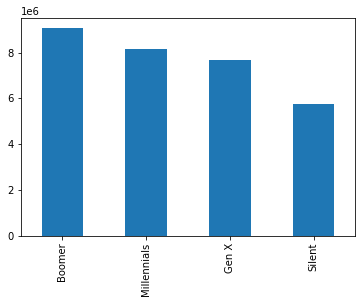

In [59]:
#create a Bar Chart for Age_Flag
ageflag=df_merge['Age_Flag'].value_counts().plot.bar()

In [66]:
ageflag.figure.savefig(os.path.join(path, 'ageflag.jpg'))

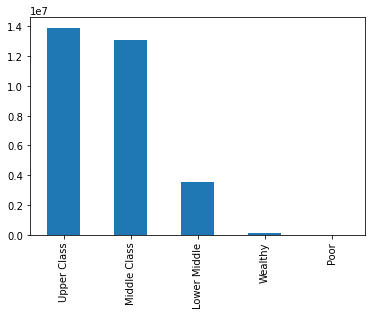

In [67]:
#create a Bar Chart for income_Flag
incomeflag=df_merge['income_flag'].value_counts().plot.bar()

In [68]:
incomeflag.figure.savefig(os.path.join(path, 'incomeflag.png'))

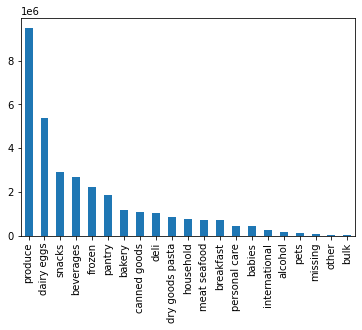

In [69]:
#create a Bar Chart for Income_Flag
departmentflag=df_merge['department'].value_counts().plot.bar()

In [70]:
departmentflag.figure.savefig(os.path.join(path, 'departmentflag.png'))

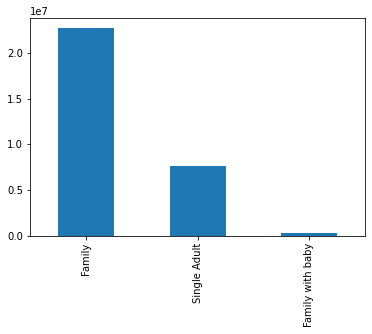

In [71]:
#create a Bar Chart for Income_Flag
dependentflag=df_merge['dependent_Flag'].value_counts().plot.bar()

In [72]:
dependentflag.figure.savefig(os.path.join(path, 'dependentflag.png'))

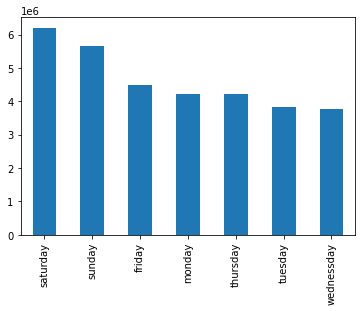

In [73]:
#create a Bar Chart for day of week
dayofweekflag=df_merge['day_of_week'].value_counts().plot.bar()

In [74]:
dayofweekflag.figure.savefig(os.path.join(path, 'dayofweekflag.png'))

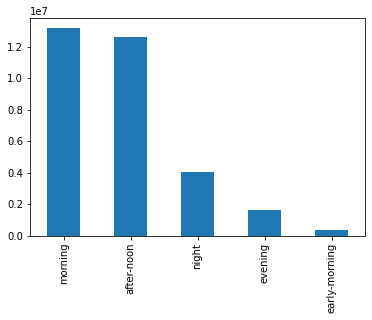

In [75]:
#create a Bar Chart for order of day
orderofdayflag=df_merge['order_of_day'].value_counts().plot.bar()

In [76]:
orderofdayflag.figure.savefig(os.path.join(path, 'orderofdayflag.png'))

In [77]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, '02_Data', 'Prepared-Data', 'df_merge.pkl'))
df.to_pickle(os.path.join(path, '02_Data', 'Prepared-Data', 'df.pkl'))

## 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

--------------------------------------------USAGE Frequency-------------------------------------------

In [97]:
# loyalty Profile Usage Frequency Aggregation
df_merge.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                   mean   max  min
loyalty_flag                                      
Loyal Customer                 6.044487  30.0  0.0
New Customer                  16.056591  30.0  0.0
Regular Customer              11.896945  30.0  0.0

In [78]:
# Age Profile Usage Frequency Aggregation
df_merge.groupby('Age_Flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                              mean   max  min
Age_Flag                                     
Boomer                   10.847135  30.0  0.0
Gen X                    10.840629  30.0  0.0
Millennials              10.866680  30.0  0.0
Silent                   10.827449  30.0  0.0

In [79]:
# Income Profile Usage Frequency Aggregation
df_merge.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                               mean   max  min
income_flag                                   
Lower Middle              11.258893  30.0  0.0
Middle Class              10.799457  30.0  0.0
Poor                      11.359012  30.0  1.0
Upper Class               10.792262  30.0  0.0
Wealthy                   10.204593  30.0  0.0

In [80]:
# dependent_Flag Profile Usage Frequency Aggregation
df_merge.groupby('dependent_Flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                   mean   max  min
dependent_Flag                                    
Family                        10.868574  30.0  0.0
Family with baby               9.816689  30.0  0.0
Single Adult                  10.823417  30.0  0.0

In [81]:
# Gender Profile Usage Frequency Aggregation
df_merge.groupby('Gender').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                         mean   max  min
Gender                                  
Female              10.831005  30.0  0.0
Male                10.862697  30.0  0.0

In [82]:
df_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'days_since_prior_order_median', 'criteria_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region', 'exclusion flag', 'Age_Flag',
       'income_flag', 'department', 'dependent_Flag', 'day_of_week',
       'order_of_day'],
      dtype='object')

In [83]:
# Region Profile Usage Frequency Aggregation
df_merge.groupby('region').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                            mean   max  min
region                                     
MidWest                10.917862  30.0  0.0
NorthEast              10.813320  30.0  0.0
South                  10.852034  30.0  0.0
West                   10.822778  30.0  0.0

--------------------------------------------Expendature-------------------------------------------

In [84]:
# Age Profile Usage Frequency Aggregation
df_merge.groupby('Age_Flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                 mean   max  min
Age_Flag                        
Boomer       7.790158  25.0  1.0
Gen X        7.798054  25.0  1.0
Millennials  7.787264  25.0  1.0
Silent       7.793066  25.0  1.0

In [85]:
# Income Profile Usage Frequency Aggregation
df_merge.groupby('income_flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                  mean   max  min
income_flag                      
Lower Middle  6.715944  25.0  1.0
Middle Class  7.901720  25.0  1.0
Poor          6.656105  24.2  1.1
Upper Class   7.960249  25.0  1.0
Wealthy       7.752360  25.0  1.0

In [86]:
# Dependent flag Profile Usage Frequency Aggregation
df_merge.groupby('dependent_Flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                      mean   max  min
dependent_Flag                       
Family            7.794482  25.0  1.0
Family with baby  7.657977  15.0  1.0
Single Adult      7.789555  25.0  1.0

In [87]:
# Gender Profile Usage Frequency Aggregation
df_merge.groupby('Gender').agg({'prices': ['mean', 'max', 'min']})

prices           
            mean   max  min
Gender                     
Female  7.790317  25.0  1.0
Male    7.793483  25.0  1.0

In [88]:
# region Profile Usage Frequency Aggregation
df_merge.groupby('region').agg({'prices': ['mean', 'max', 'min']})

prices           
               mean   max  min
region                        
MidWest    7.793990  25.0  1.0
NorthEast  7.782777  25.0  1.0
South      7.796263  25.0  1.0
West       7.796069  25.0  1.0

#8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

-----------------------------------------------Regions------------------------------------------------

In [89]:
pd.crosstab(df_merge['Age_Flag'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
Age_Flag,,,,
Boomer,2130727,1611978,2975372,1417610
Gen X,1832990,1318145,2575384,1188132
Millennials,1883175,1453786,2732729,1291668
Silent,1328824,1037311,1913851,898556


In [90]:
pd.crosstab(df_merge['income_flag'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
income_flag,,,,
Lower Middle,821345,616160,1195800,533109
Middle Class,3000074,2308748,4409277,2072425
Poor,62,0,160,466
Upper Class,3323355,2480989,4562369,2178202
Wealthy,30880,15323,29730,11764


In [91]:
pd.crosstab(df_merge['dependent_Flag'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
dependent_Flag,,,,
Family,5302759,4027111,7551812,3544197
Family with baby,69120,54144,100958,44549
Single Adult,1803837,1339965,2544566,1207220


In [92]:
pd.crosstab(df_merge['Gender'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
Gender,,,,
Female,3572371,2607506,5079742,2374738
Male,3603345,2813714,5117594,2421228


In [99]:
pd.crosstab(df_merge['family_status'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
family_status,,,,
divorced/widowed,613168,476238,872979,412103
living with parents and siblings,344128,255083,504027,219749
married,5027751,3826172,7148743,3368997
single,1190669,863727,1671587,795117


In [100]:
pd.crosstab(df_merge['department'], df_merge['region'], dropna=False)

region,MidWest,NorthEast,South,West
department,,,,
alcohol,34870,25250,48992,23555
babies,93108,71571,135073,60329
bakery,259137,197707,366755,174140
beverages,590671,457231,848865,396295
breakfast,154512,116615,220438,105915
bulk,7744,5441,10834,5226
canned goods,236949,177319,336416,160287
dairy eggs,1192520,900409,1696882,798856
deli,232438,176617,330288,155233


-----------------------------------------------Departments------------------------------------------------

In [93]:
pd.crosstab(df_merge['Age_Flag'], df_merge['department'], dropna=False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Age_Flag,,,,,,,,,,,,,,,,,,,,,
Boomer,42365,117558,328308,754155,194814,9497,300334,1493677,294750,243485,...,206183,74563,199195,19179,10255,526070,125979,27796,2652397,808670
Gen X,37024,104772,277402,635402,165344,8225,252494,1284150,249831,203845,...,175305,64073,167534,16334,8479,443352,106497,22938,2252033,679866
Millennials,41120,104345,295145,667711,178202,8812,269710,1360286,262976,219382,...,183222,68705,178063,17854,9240,470327,111256,24679,2379386,728649
Silent,26026,73703,207685,482891,124890,6078,187122,958291,186007,153102,...,131976,47300,126450,12044,6061,331422,77836,16840,1679680,513297


In [94]:
pd.crosstab(df_merge['income_flag'], df_merge['department'], dropna=False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Lower Middle,18866,29368,111969,395498,94904,4836,85215,523493,111564,69290,...,90957,22957,36643,7161,3999,175475,50166,9115,864336,575321
Middle Class,58423,178751,476469,1036215,275127,14012,442937,2209955,426026,360878,...,288380,112878,301507,28605,14501,764469,179813,38517,3927111,1068920
Poor,0,1,24,39,22,0,45,141,25,8,...,15,17,2,0,1,32,10,0,191,90
Upper Class,66621,191544,515491,1099603,290953,13759,477689,2347796,453229,386839,...,312725,117955,330781,29541,15370,825103,190038,43884,4152191,1077744
Wealthy,2625,714,4587,8804,2244,5,3774,15019,2720,2799,...,4609,834,2309,104,164,6092,1541,737,19667,8407


In [95]:
pd.crosstab(df_merge['dependent_Flag'], df_merge['department'], dropna=False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependent_Flag,,,,,,,,,,,,,,,,,,,,,
Family,109172,0,829884,1902466,498023,24805,759298,3824198,743439,616326,...,526877,190636,506568,49266,25524,1330863,316256,69236,6721304,2046335
Family with baby,0,299666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Single Adult,37363,100712,278656,637693,165227,7807,250362,1272206,250125,203488,...,169809,64005,164674,16145,8511,440308,105312,23017,2242192,684147


In [96]:
pd.crosstab(df_merge['Gender'], df_merge['department'], dropna=False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Gender,,,,,,,,,,,,,,,,,,,,,
Female,75571,194552,551876,1260072,329734,16248,496221,2527825,493063,405415,...,345061,125409,331030,32094,16840,875543,209212,44871,4432920,1355559
Male,70964,205826,556664,1280087,333516,16364,513439,2568579,500501,414399,...,351625,129232,340212,33317,17195,895628,212356,47382,4530576,1374923


#9.Produce suitable charts to illustrate your results and export them in your project folder.

Answer: done

#10.Tidy up your script, export your final data set, and save your notebook.

Answer: done

In [98]:
pd.crosstab(df_merge['Age_Flag'], df_merge['family_status'], dropna=False)

family_status,divorced/widowed,living with parents and siblings,married,single
Age_Flag,,,,
Boomer,1195413,0,6759756,1102675
Gen X,0,0,5787555,1896545
Millennials,0,1470635,4647587,2019772
Silent,1434115,0,4310907,0
